# Introduction to using ParticleSpy

This is an example notebook for performing particle analysis using ParticleSpy.

This notebook takes a HAADF image of nanoparticles, allows the user to determine the best segmentation method and then performs analysis, producing a plot of particle areas.

**Note for M&M 2022**: This notebook was copied from a prior HyperSpy workshop and only minor changes were made to ensure it runs with the current Hyperspy-bundle installation. The original copy can be found at https://github.com/ePSIC-DLS/Hyperspy_Workshop_2022/tree/main/particlespy_demo  - Joshua Taillon, July 25, 2022

Below, we load an image using Hyperspy.

In [1]:
# Import hyperspy, particlespy, trackpy, and matplotlib
import hyperspy.api as hs
import particlespy.api as ps
import trackpy as tp
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


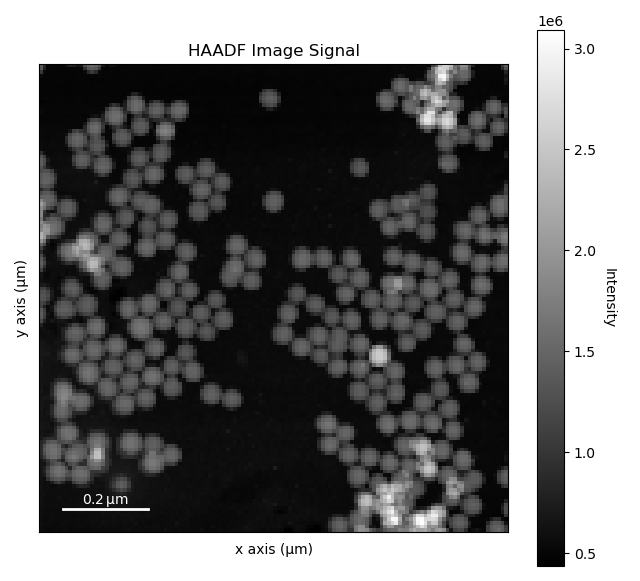

In [3]:
# load data and initialize matplotlib backed 
filename = 'SiO2 HAADF Image.hspy'
haadf = hs.load(filename)

%matplotlib notebook

# plot the HAADF image
haadf.plot()

ParticleSpy works by defining parameters to run segmentation. This is done through the parameters object, which can be loaded with default values.

In [7]:
# create and generate default segmentation parameters
params = ps.parameters()
params.generate()

Let's take a look at the default segmentation parameters.

In [8]:
# examine segmentation parameters
params.segment

{'threshold': 'otsu',
 'watershed': False,
 'watershed_size': 0,
 'watershed_erosion': 0,
 'invert': False,
 'min_size': 0,
 'rb_kernel': 0,
 'gaussian': 0,
 'local_size': 1}

The default is a simple Otsu threshold with no other options selected. We could apply these parameters to segment the particles but we don't know how well these will work on our individual images. In order to check this out, we can use ParticleSpy's segmentation GUI. Experiment with changing the threshold algorithm and the application of watershedding to obtain the optimum labels. Once happy, click "Get Params" to print the current parameters.

<span style="color:red">WARNING: Don't run this if on Google Cloud Platform!</span>

In [10]:
# run segmentation UI (will open in new window, so only works when running code locally)
ps.seg_ui(haadf)

# the results stored here provide a decent (but not perfect segmentation)

QLayout: Attempting to add QLayout "" to Application "", which already has a layout
QWidget::setLayout: Attempting to set QLayout "" on Application "", which already has a layout
QLayout: Attempting to add QLayout "" to Application "", which already has a layout


{'threshold': 'otsu', 'watershed': True, 'watershed_size': 4, 'watershed_erosion': 0, 'invert': False, 'min_size': 12, 'rb_kernel': 0, 'gaussian': 0, 'local_size': 1}


Next, we use the parameters saved when last pressing Update in the GUI to construct a parameter dictionary.

In [11]:
# store the parameters generated in the UI
params.load()
params.store['store_im'] = True

If running a notebook on a remote server there is an alternative method to check segmentation parameters using the process function (however, this isn't included in the api).

<IPython.core.display.Javascript object>


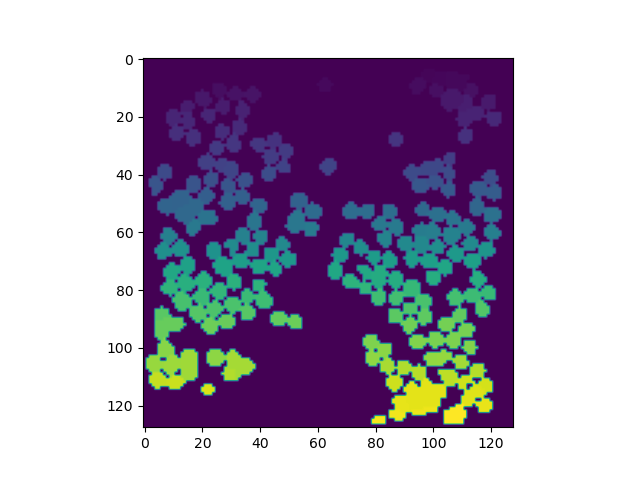

In [12]:
# run the following to check segmentation parameters if running remotely
import particlespy
seg = particlespy.segptcls.process(haadf,params)
plt.figure()
plt.imshow(seg)

Once we're happy with the segmentation parameters, we run the particle_analysis function to segment our image and provide a list of all the particles.

In [13]:
# run the actual particle analysis
particles = ps.particle_analysis(haadf,params)

Let's interrogate the particle data a little bit. From an initial image we get a number of particle properties calculated automatically.

In [14]:
# print the properties of the particles calculated automatically
print(particles.list[0].properties)

{'area': {'value': 0.0013897423288512954, 'units': 'µm^2'}, 'equivalent circular diameter': {'value': 0.042065126768925924, 'units': 'µm'}, 'x': {'value': 0.04861390374993023, 'units': 'µm'}, 'y': {'value': 0.839490097163147, 'units': 'µm'}, 'major axis length': {'value': 0.04343684018581211, 'units': 'µm'}, 'minor axis length': {'value': 0.04152910281239791, 'units': 'µm'}, 'circularity': {'value': 1.2801536991122482, 'units': None}, 'eccentricity': {'value': 0.2931051908802741, 'units': None}, 'solidity': {'value': 0.95, 'units': None}, 'intensity': {'value': 9467681.0, 'units': None}, 'intensity_max': {'value': 738979.7, 'units': None}, 'intensity_std': {'value': 0.023866808, 'units': None}, 'bbox_area': {'value': 0.001828608327435915, 'units': 'µm^2'}, 'bbox_length': {'value': 0.06047492583601761, 'units': 'µm'}, 'frame': {'value': None, 'units': None}}


It is then possible to plot a histogram of particle area.

<IPython.core.display.Javascript object>


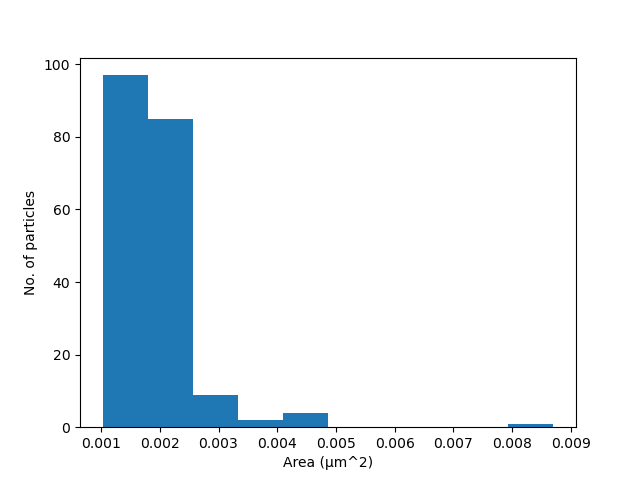

In [15]:
# plot a histogram of particle sizes
particles.plot()

It is also possible to plot a scatter plot of two properties. In this instance, plotting 'intensity' vs area.

<IPython.core.display.Javascript object>


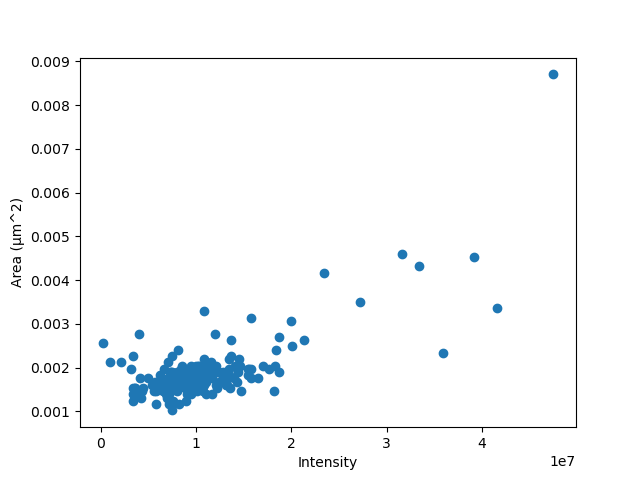

In [16]:
# plot scatter data about particles intensity and size
particles.plot(['intensity','area'])

## ParticleSpy with EDS data

If you have EDS data collected simultaneously with an image, it is possible to extract maps, spectra and the composition from each segmented particle. Firstly, load the EDS spectrum image.

In [19]:
# load simultaneous EDS data collected with above HAADF
eds_filename = 'SiO2 EDS Spectrum Image.hspy'
eds = hs.load(eds_filename)

Next, put the HAADF image and EDS spectrum image together in a list to make one acquisition.

In [20]:
# join the HAADF image and EDS spectrum image into a list
# use smaller area (first 32 pixels) to speed up analysis
ac = [haadf.isig[0:32,0:32],eds.inav[0:32,0:32]]

At this point, we need to set the parameters for the EDS analysis. This can be done by taking our previously used parameters object adding parameters with generate_eds().

In [21]:
# Use generate_eds() method to set parameters for the EDS analysis
params.generate_eds(eds_method='CL',elements=['Si','O'], factors=[1.,1.3],store_maps=True)

Now, we need to run ParticleAnalysis again in order to get the accompanying EDS data.

In [22]:
# analyze particles again to get EDS data with particles
particles2 = ps.particle_analysis(ac,params)

/home/jat/tmp/hyperspy-bundle/lib/python3.9/site-packages/particlespy/segptcls.py:124: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((min_size, min_size)),
/home/jat/tmp/hyperspy-bundle/lib/python3.9/site-packages/particlespy/segptcls.py:61: FutureWarning: in_place argument is deprecated and will be removed in version 1.0. To avoid this warning, please do not use the in_place argument. Please see remove_small_objects documentation for more details. Please use out argument instead.
  remove_small_objects(labels,param.segment["min_size"],in_place=True)


[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


The extracted maps of each element can be accessed from the particle list from maps['element'].

<IPython.core.display.Javascript object>


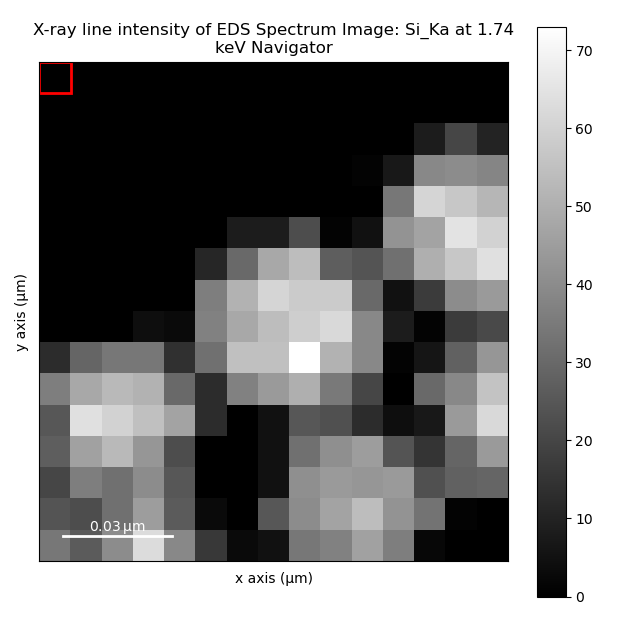

In [23]:
# extract Si map and plot
particles2.list[1].maps['Si'].plot()

The composition of each particle can be accessed from the particle list using list[particle].composition.

In [24]:
# examine the composition of the first particle
particles2.list[0].composition

{'O': array([44.91907296]), 'Si': array([55.08092704])}

We can plot a radial profile of the particle intensity from both the image and our elemental maps.

<IPython.core.display.Javascript object>


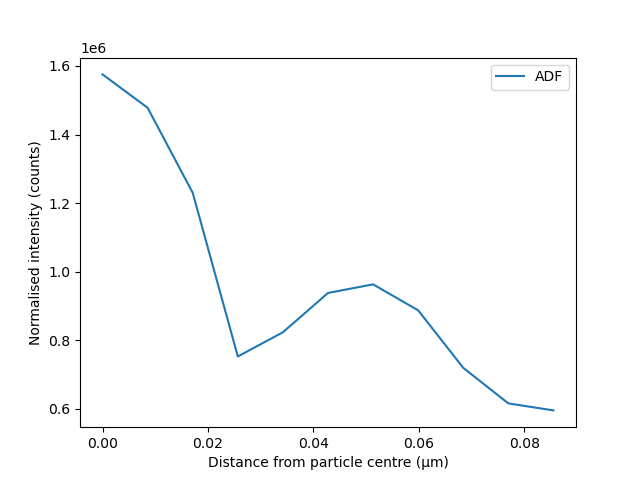

In [30]:
# plot radial profile of particle intensity
rp = ps.radial_profile(particles2.list[1], ['Image'], plot=True)
plt.show()

<IPython.core.display.Javascript object>


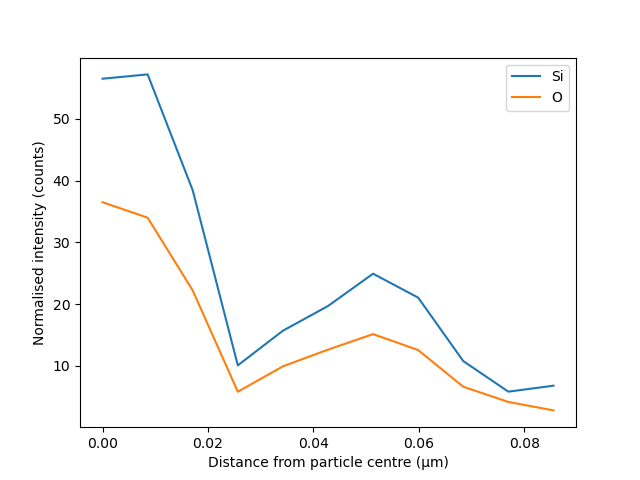

In [31]:
# plot radial profile of elemental maps
rp2 = ps.radial_profile(particles2.list[1], ['Si','O'], plot=True)
plt.show()

## ParticleSpy with time-series data

ParticleSpy can also be used to track properties through a time-series of images. Let's see that in action on a short series of only 10 frames.

In [32]:
series = hs.load('particle_series.dm4')

<IPython.core.display.Javascript object>


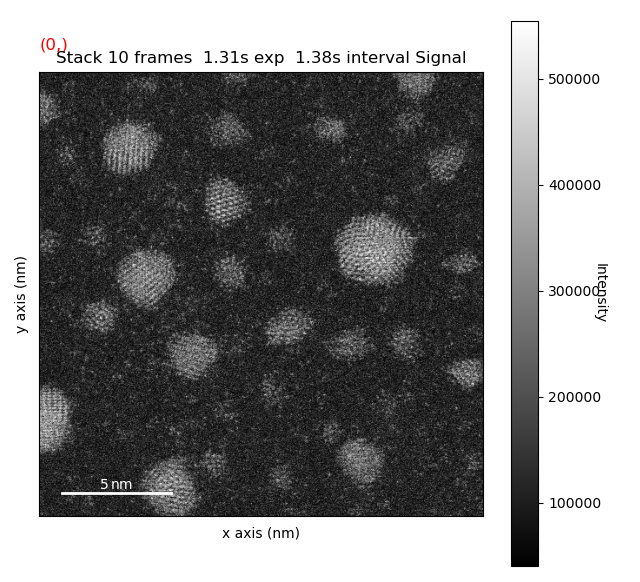

In [46]:
series.plot(navigator='slider')

We'll define some new parameters that work well for this data.

In [38]:
# create parameters
params_series = ps.parameters()

In [39]:
# these settings work well to generate parameters for this data
params_series.generate(threshold='mean',min_size=200,gaussian=3)

For particle series, there is a modified ParticleAnalysis function called ParticleAnalysisSeries that deals with multiple frames.

In [40]:
# do a time-series particle analysis
particles_series = ps.particle_analysis_series(series, params_series)

/home/jat/tmp/hyperspy-bundle/lib/python3.9/site-packages/particlespy/segptcls.py:61: FutureWarning: in_place argument is deprecated and will be removed in version 1.0. To avoid this warning, please do not use the in_place argument. Please see remove_small_objects documentation for more details. Please use out argument instead.
  remove_small_objects(labels,param.segment["min_size"],in_place=True)


In [41]:
# examine the properties of the particles
particles_series.list[0].properties

{'area': {'value': 0.899026165361284, 'units': 'nm^2'},
 'equivalent circular diameter': {'value': 1.0698951656539066, 'units': 'nm'},
 'x': {'value': 0.6144626603511838, 'units': 'nm'},
 'y': {'value': 4.7255886427386695, 'units': 'nm'},
 'major axis length': {'value': 1.646076708773212, 'units': 'nm'},
 'minor axis length': {'value': 0.777777740919379, 'units': 'nm'},
 'circularity': {'value': 0.5894283829404484, 'units': None},
 'eccentricity': {'value': 0.8813285543240404, 'units': None},
 'solidity': {'value': 0.8624813153961136, 'units': None},
 'intensity': {'value': 18600964.0, 'units': None},
 'intensity_max': {'value': 208793.02, 'units': None},
 'intensity_std': {'value': 0.015463822, 'units': None},
 'bbox_area': {'value': 1.3088075890874844, 'units': 'nm^2'},
 'bbox_length': {'value': 1.7832809146704964, 'units': 'nm'},
 'frame': {'value': 0, 'units': None}}

Now we have a list of particles, with their properties attached including the frame number. We can now pass them through another function that uses the trackpy package to track the same particles through a time series.

In [42]:
# perform time series analysis
series_test = ps.time_series_analysis(particles_series)

Frame 9: 25 trajectories present.


The returned series_test is a pandas dataframe, which is the standard object that is used in trackpy.

We can use trackpy to do cool things like plot the trajectory of all particles in the series. Note: while the axes say they are in pixels, they are actually in nm in this case! (I have just noticed this and will fix)

<IPython.core.display.Javascript object>


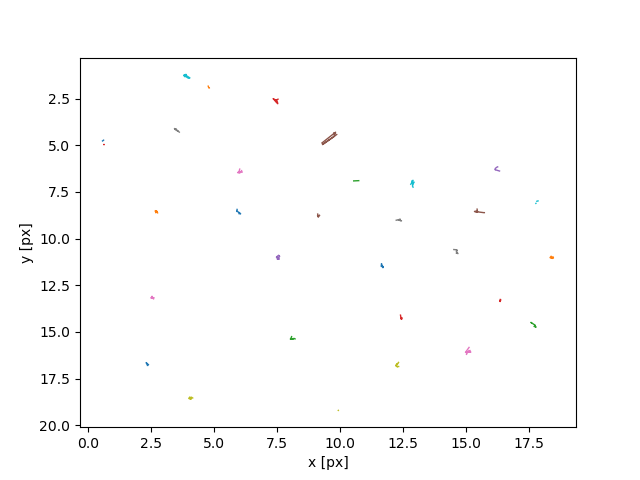

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [43]:
# use trackpy to plot particle trajectories
plt.figure()
tp.plot_traj(series_test)

Trackpy also lets you correct for any systematic drift in the series.

<IPython.core.display.Javascript object>


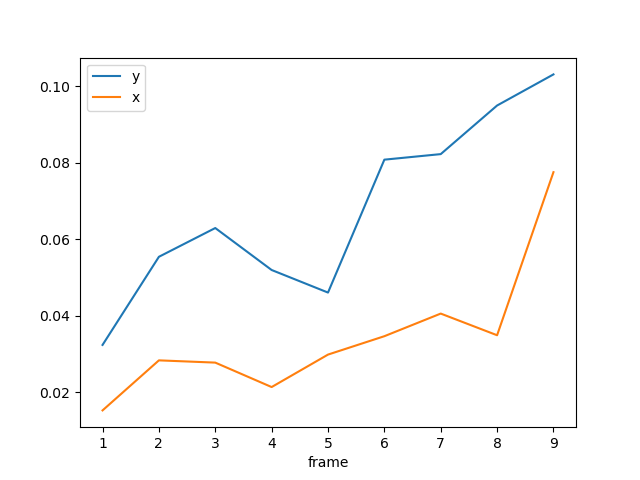

<AxesSubplot:xlabel='frame'>

In [44]:
# compute systematic drift
drift = tp.compute_drift(series_test)
drift.plot()

<IPython.core.display.Javascript object>


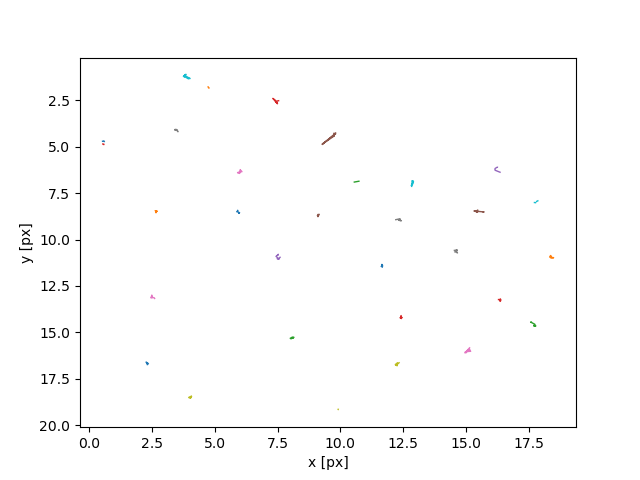

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [45]:
# remove systematic drift and plot new trajectories
tm = tp.subtract_drift(series_test.copy(), drift)
tp.plot_traj(tm)

Using the particlespy workflow for time-series data, you also have any of the properties specified in the pandas dataframe and you can plot these as a function of frame number.

<IPython.core.display.Javascript object>


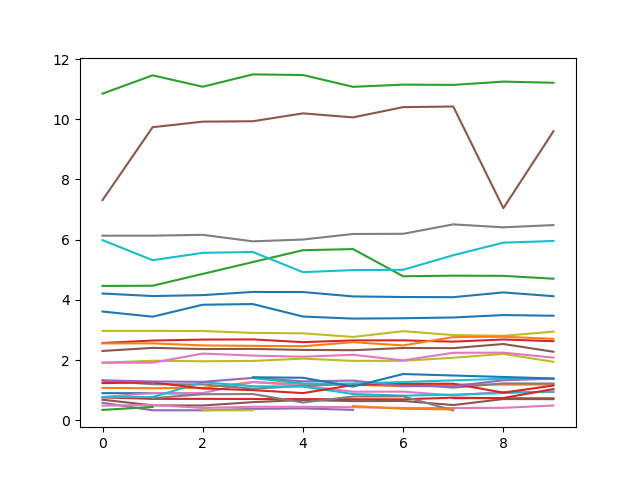

In [47]:
# plot particle area vs frame number:
import matplotlib.pyplot as plt
plt.figure()
for index, particle in tm.groupby('particle'):
    plt.plot(particle['frame'], particle['area'], label=index)